In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from imblearn.metrics import classification_report_imbalanced

In [2]:
data = pd.read_csv("data.csv")
labels = pd.read_csv("labels.csv")

In [3]:
data.head()

,Unnamed: 0,k__Viruses.f__Phycodnaviridae.g__Prasinovirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__Sfi1unalikevirus,k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Simplexvirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__C2likevirus,k__Viruses.f__Poxviridae.g__Parapoxvirus,k__Viruses.f__Papillomaviridae.g__Dyolambdapapillomavirus,k__Viruses.o__Mononegavirales.f__Bornaviridae.g__Bornavirus,k__Viruses.f__Bicaudaviridae.g__Bicaudavirus,k__Viruses.o__Picornavirales.f__Picornaviridae.g__Aquamavirus,...,k__Bacteria.p__Synergistetes.c__Synergistia.o__Synergistales.f__Synergistaceae.g__Cloacibacillus,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Lachnospiraceae.g__Sellimonas,k__Archaea.p__Thaumarchaeota.g__Candidatus_Nitrosotenuis,k__Bacteria.p__Rhodothermaeota.c__Balneolia.o__Balneolales.f__Balneolaceae.g__Gracilimonas,k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Thermoproteales.f__Thermoproteaceae.g__Caldivirga,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiales_Family_XIII._Incertae_Sedis.g__Casaltella,k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Desulfurococcales.f__Desulfurococcaceae.g__Thermosphaera,k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Neisseriales.f__Chromobacteriaceae.g__Deefgea,k__Bacteria.p__Deferribacteres.c__Deferribacteres.o__Deferribacterales.f__Deferribacteraceae.g__Geovibrio,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Subdoligranulum
0,s12859,0,0,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,s12878,0,0,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,s12857,2,0,484,0,8,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
3,s12882,4,0,96,0,2,0,0,2,4,...,0,0,0,0,0,0,0,0,0,0
4,s12871,2,0,128,0,16,0,4,0,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels.head()

,Sample,disease_type
0,s12859,colon cancer
1,s12878,colon cancer
2,s12857,colon cancer
3,s12882,colon cancer
4,s12871,colon cancer


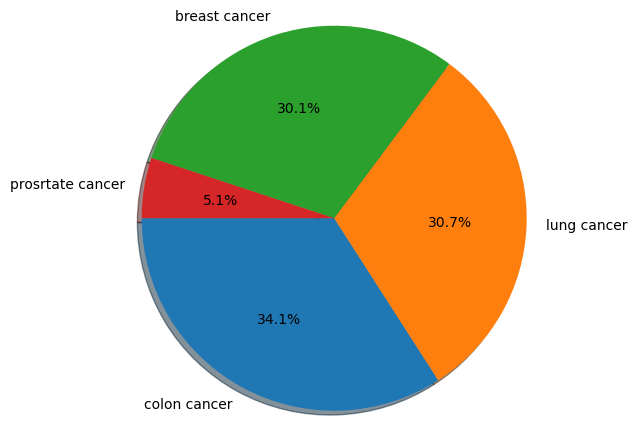

In [24]:
plt.figure( figsize= (5,5))
plt.pie((labels.disease_type.value_counts())/100 , labels=pd.unique(labels.disease_type), startangle
=180 , autopct='%1.1f%%' ,textprops={ 'fontsize': 10 , 'rotation':0}, shadow=True, radius=1.25)
plt.show()

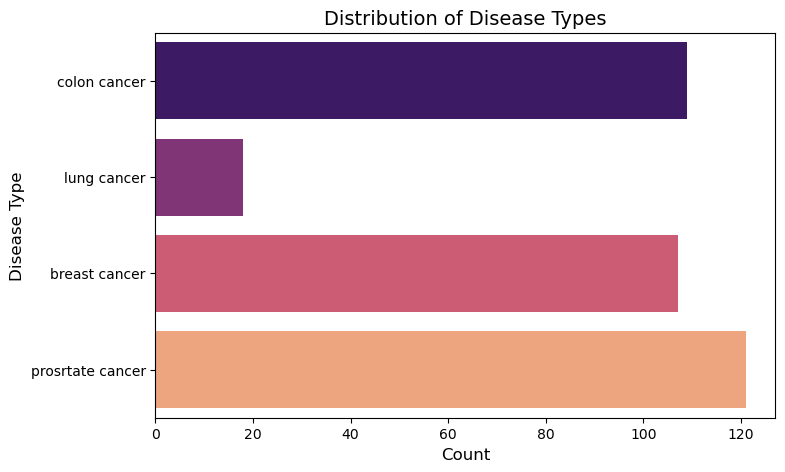

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(y=labels.disease_type, hue=labels.disease_type, palette='magma', dodge=False, legend=False)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Disease Type', fontsize=12)
plt.title('Distribution of Disease Types', fontsize=14)
plt.show()

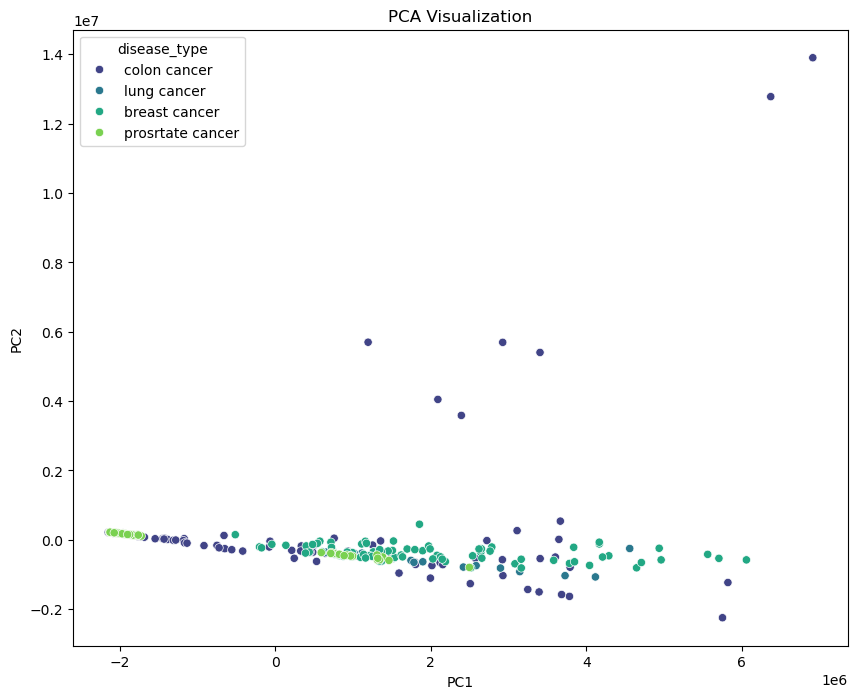

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data.iloc[:, 1:])
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

final_df = pd.concat([principal_df, labels['disease_type']], axis=1)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='disease_type', data=final_df, palette='viridis')
plt.title('PCA Visualization')
plt.show()

# RANDOM FOREST

In [8]:
X = data.drop(['Unnamed: 0'], axis=1)
y = labels.disease_type

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=42)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

rf = RandomForestClassifier()

param_grid = {
     'n_estimators': [50, 100],
    'max_features': [7, 19, 21],
    'min_samples_split': [3, 7, 11],
    'max_depth': [3, 7, 11]
}

In [11]:
# StratifiedKFold kullanarak çapraz doğrulama stratejisini belirle
cv = StratifiedKFold(n_splits=3)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk:", grid_search.best_score_)

En iyi parametreler: {'max_depth': 11, 'max_features': 21, 'min_samples_split': 3, 'n_estimators': 50}
En iyi doğruluk: 0.961216871967152


In [12]:
best_params_rf =  grid_search.best_params_

In [13]:
rf = RandomForestClassifier(max_depth=best_params_rf['max_depth'], 
                            max_features=best_params_rf['max_features'], 
                            min_samples_split=best_params_rf['min_samples_split'], 
                            n_estimators=best_params_rf['n_estimators']).fit(X_train, y_train)

In [14]:
y_pred = rf.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.9436619718309859

In [16]:
cross_val_score(rf, X_test, y_test, cv=3).mean()

\\?\C:\Users\erens\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


0.8435990338164251

In [17]:
from imblearn.metrics import sensitivity_specificity_support
sensitivity_specificity_support(y_test, y_pred, average='micro', labels=pd.unique(labels.disease_type))

(0.9436619718309859, 0.9812206572769953, None)

In [18]:
print(classification_report_imbalanced(y_test, y_pred, target_names=pd.unique(labels.disease_type)))

                        pre       rec       spe        f1       geo       iba       sup

    colon cancer       1.00      0.83      1.00      0.91      0.91      0.82        18
     lung cancer       0.93      0.96      0.96      0.94      0.96      0.92        26
   breast cancer       1.00      1.00      1.00      1.00      1.00      1.00         2
prosrtate cancer       0.93      1.00      0.96      0.96      0.98      0.96        25

     avg / total       0.95      0.94      0.97      0.94      0.95      0.91        71



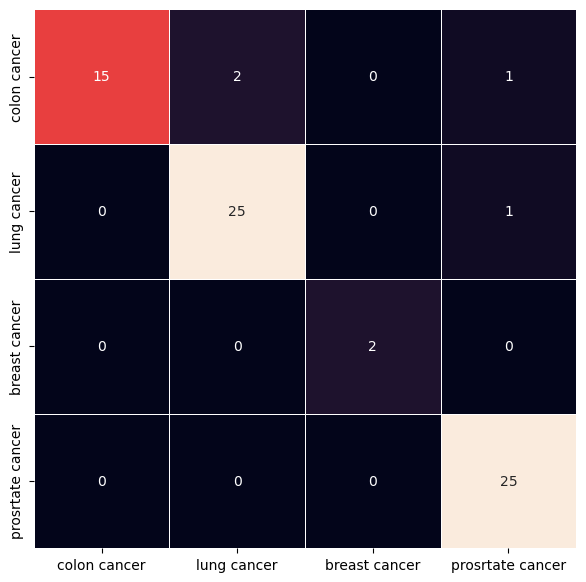

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False, xticklabels=pd.unique(labels.disease_type),yticklabels=pd.unique(labels.disease_type))
plt.show()

# XGBoost

# fix 

In [20]:
from xgboost import XGBClassifier

In [21]:
xgboost = XGBClassifier()

xgboost_params = {'learning_rate': [0.1, 0.01, 0.001],
            'subsample':[0.6, 0.8, 1],
            'n_estimators': [100,500],
            'max_depth':[3,5,7]}

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Kategorik değerleri sayısal değerlere dönüştür
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# XGBoost modelini tanımla
xgboost = xgb.XGBClassifier()

# GridSearchCV ile parametre araması yap
xgboost_params = {'learning_rate': [0.1, 0.01, 0.001],
                  'subsample': [0.6, 0.8, 1],
                  'n_estimators': [100, 500],
                  'max_depth': [3, 5, 7]}
xgboost_cv_model = GridSearchCV(xgboost, xgboost_params, cv=10, n_jobs=-1, verbose=2)

# Modeli eğit
xgboost_cv_model.fit(X_train, y_train_encoded)


Fitting 10 folds for each of 54 candidates, totalling 540 fits


KeyboardInterrupt: 

In [ ]:
xgboost_cv_model

best_params_xgb = xgboost_cv_model.best_params_

In [ ]:
# 3. XGBoost modelini oluşturup eğitme
xgboost = XGBClassifier(
    learning_rate=best_params_xgb['learning_rate'], 
    max_depth=best_params_xgb['max_depth'], 
    n_estimators=best_params_xgb['n_estimators'], 
    subsample=best_params_xgb['subsample']).fit(X_train, y_train_encoded)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kategorik değerleri sayısal değerlere dönüştürme
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# XGBoost modelini tanımlama
xgboost = XGBClassifier()

# GridSearchCV ile parametre araması yapma
xgboost_params = {'learning_rate': [0.1, 0.01, 0.001],
                  'subsample': [0.6, 0.8, 1],
                  'n_estimators': [100, 500],
                  'max_depth': [3, 5, 7]}
xgboost_cv_model = GridSearchCV(xgboost, xgboost_params, cv=10, n_jobs=-1, verbose=2)

# Modeli eğitme
xgboost_cv_model.fit(X_train, y_train_encoded)

# En iyi parametreleri alıp modeli tekrar eğitme
best_params_xgb = xgboost_cv_model.best_params_
xgboost = XGBClassifier(
    learning_rate=best_params_xgb['learning_rate'], 
    max_depth=best_params_xgb['max_depth'], 
    n_estimators=best_params_xgb['n_estimators'], 
    subsample=best_params_xgb['subsample']).fit(X_train, y_train_encoded)

# Test verisi üzerinde model performansını değerlendirme
y_test_pred = xgboost.predict(X_test)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print("Test verisi doğruluk skoru:", test_accuracy)


In [ ]:
y_pred = xgboost.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
cross_val_score(xgboost, X_test, y_test, cv=21).mean()

In [ ]:
from imblearn.metrics import sensitivity_specificity_support
sensitivity_specificity_support(y_test, y_pred, average='micro', labels=pd.unique(labels.disease_type))

In [ ]:
print(classification_report_imbalanced(y_test, y_pred, target_names=pd.unique(labels.disease_type)))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False, xticklabels=pd.unique(labels.disease_type),yticklabels=pd.unique(labels.disease_type))
plt.show()

# Conclusion

In [ ]:
models = [rf, xgboost]
result = []
results = pd.DataFrame(columns=['Models', "Accuracy"])

for model in models:
    names = model.__class__.__name__
    print(names)
    if names == 'MLPClassifier':
        y_pred = model.predict(X_test_scaler)
    else:
        y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[names, acc*100]], columns=['Models', 'Accuracy'])
    results = results.append(result)

In [ ]:
sns.barplot(x='Accuracy', y='Models', data=results, color='r')
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

In [ ]:
results